### 2. Kicking horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import poisson as poi


The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space. The formula for the Poisson probability mass function is given by:
 
\begin{equation}
P(X = k) = \frac{\mu^k e^{-\mu}}{k!} 
\end{equation}


0.61


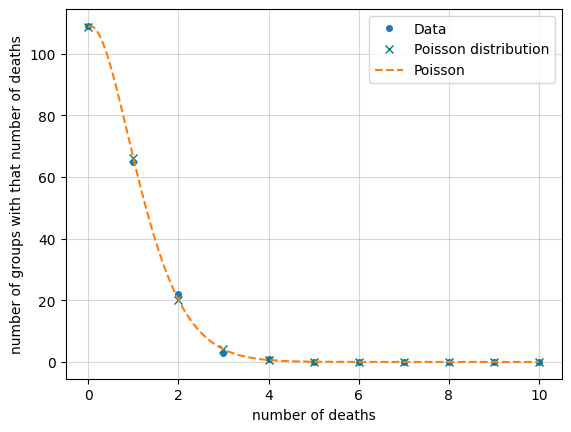

In [36]:
#I need to plot the provbability distribution 

deaths = np.array( [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n_groups = np.array ([109, 65, 22, 3, 1, 0, 0, 0, 0, 0, 0])

plt.plot(deaths, n_groups, 'o', markersize=4, label='Data')
plt.xlabel('number of deaths')
plt.ylabel('number of groups with that number of deaths')
plt.grid(alpha=0.5)

mean= np.sum(deaths*n_groups)/np.sum(n_groups)
print(mean)

#poisson distribution using the mmean of the data, then we'll fit the data to determine the mean
poisson = []
for d in deaths:
    poisson = np.append (poisson , np.exp(-mean)*mean**d/math.factorial(d) )

plt.plot(deaths, poisson*np.sum(n_groups),'x' ,color= 'teal', label='Poisson distribution')

# one can also calculate it with scipy
#poisson_scipy = poi.pmf(deaths, mean) * np.sum(n_groups)
#plt.plot(deaths, poisson_scipy, 'x',label='Poisson distribution (scipy)')

#to plot it:
x_grid = np.linspace(0, max(deaths), 200)
poisson_smooth = np.exp(-mean) * mean**x_grid / np.array([math.gamma(x + 1) for x in x_grid])
plt.plot(x_grid, poisson_smooth * np.sum(n_groups), '--', label=f'Poisson')


plt.legend()

## let's do a fit

emprical mean: 0.610000 
fitted mean: 0.6084218868132905


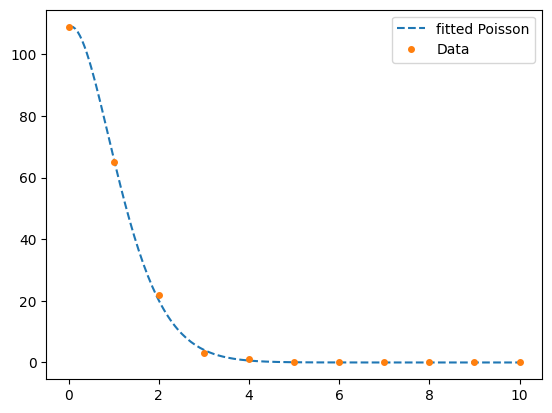

In [44]:
from scipy.optimize import curve_fit

def poisson_pdf(k, mu):
    k = np.array(k, dtype=int)

    return np.exp(-mu) * mu**k / np.array([math.factorial(x) for x in k])

normalized_counts = n_groups / np.sum(n_groups)
params, _ = curve_fit(poisson_pdf, deaths, normalized_counts)

fitted_mean = params[0]
print(f"emprical mean: {mean:.6f}", f"\nfitted mean: {fitted_mean}")

#to plot it:
x_grid = np.linspace(0, max(deaths), 200)
fitted_poisson = np.exp(-fitted_mean) * fitted_mean**x_grid / np.array([math.gamma(x + 1) for x in x_grid])

plt.plot(x_grid, fitted_poisson * np.sum(n_groups), '--', label=f'fitted Poisson')
plt.plot(deaths, n_groups, 'o', markersize=4, label='Data')
plt.legend()